In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
df= pd.read_csv("List of Countries by Sugarcane Production.csv")
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [3]:
df.shape

(103, 7)

data cleaning


In [4]:
df["Production (Tons)"]=df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"]=df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"]=df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]=df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [5]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [6]:
df.rename(columns={"Production (Tons)" : "Production(Tons)"}, inplace = True)
df.rename(columns={"Production per Person (Kg)": "Production_per_Person(Kg)"},inplace=True)
df.rename(columns={"Acreage (Hectare)" : "Acreage(Hectare)"},inplace=True)
df.rename(columns={"Yield (Kg / Hectare)" : "Yield(Kg/Hectare)"},inplace=True)

In [7]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [8]:
df.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [9]:
df[df["Acreage(Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [10]:
df= df.dropna().reset_index()
df.head()

,index,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [11]:
df.drop(["index", "Unnamed: 0"], axis=1, inplace=True)

In [12]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [13]:
df.dtypes


Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [14]:
df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production_per_Person(Kg)"] = df["Production_per_Person(Kg)"].astype(float)
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"] =df["Yield(Kg/Hectare)"].astype(float)



In [15]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [16]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

In [17]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


how many countries produce sugarcane from each continent?

In [18]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

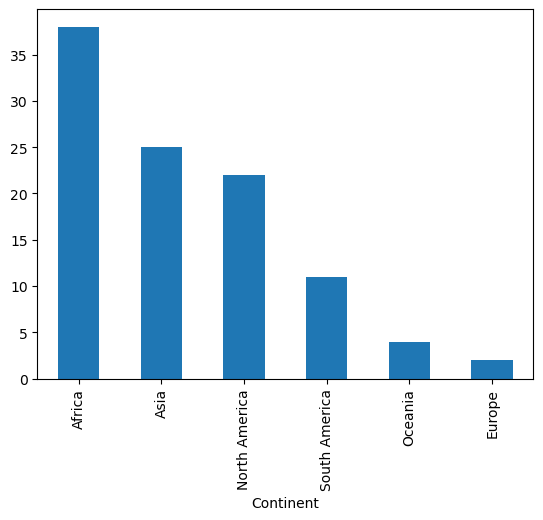

In [19]:
df["Continent"].value_counts().plot(kind="bar")

checking outliers

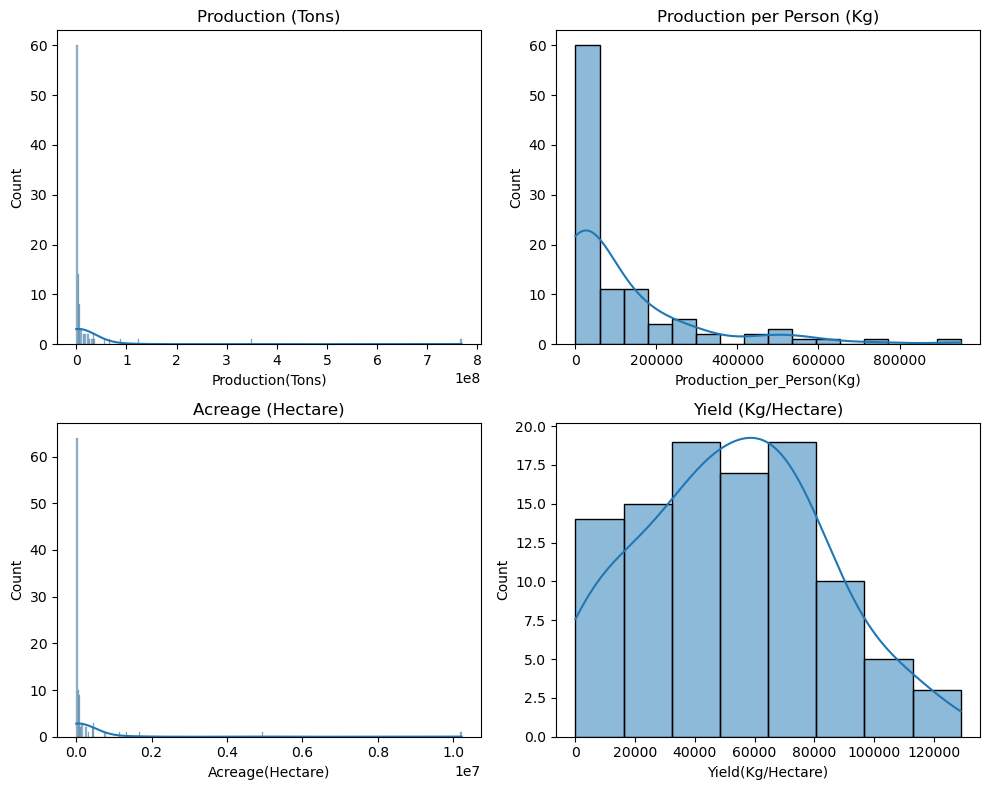

In [20]:

plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
sns.histplot(df["Production(Tons)"] ,kde= True)
plt.title("Production (Tons)")

plt.subplot(2, 2, 2)
sns.histplot(df["Production_per_Person(Kg)"],kde= True)
plt.title("Production per Person (Kg)")

plt.subplot(2, 2, 3)
sns.histplot(df["Acreage(Hectare)"],kde= True)
plt.title("Acreage (Hectare)")

plt.subplot(2, 2, 4)
sns.histplot(df["Yield(Kg/Hectare)"],kde= True)
plt.title("Yield (Kg/Hectare)")

plt.tight_layout()
plt.show()


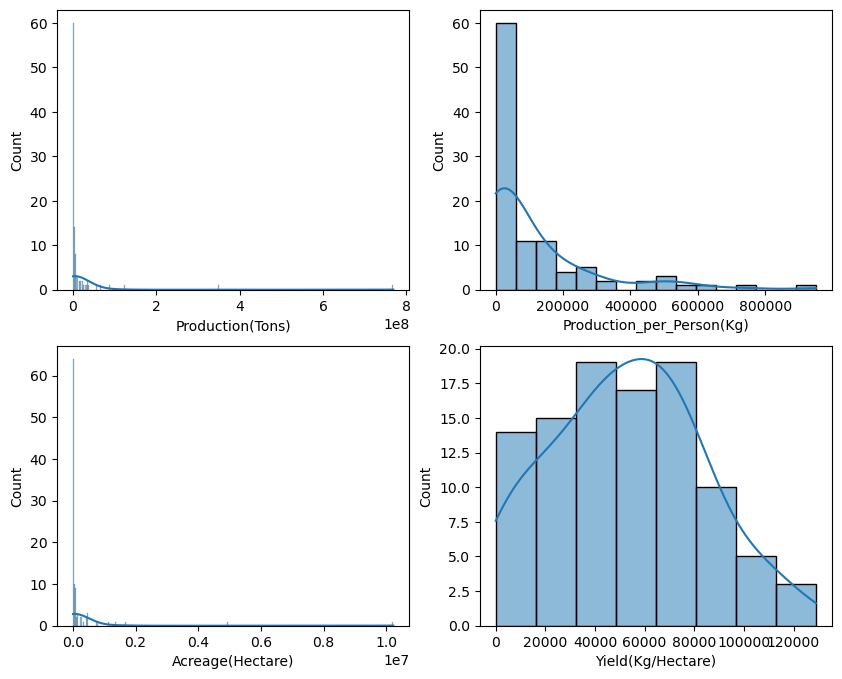

In [41]:
plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
sns.histplot(df["Production(Tons)"] ,kde= True)
plt.subplot(2, 2, 2)
sns.histplot(df["Production_per_Person(Kg)"],kde= True)
plt.subplot(2, 2, 3)
sns.histplot(df["Acreage(Hectare)"],kde= True)
plt.subplot(2, 2, 4)
sns.histplot(df["Yield(Kg/Hectare)"],kde= True)
plt.show()


<Axes: ylabel='Yield(Kg/Hectare)'>

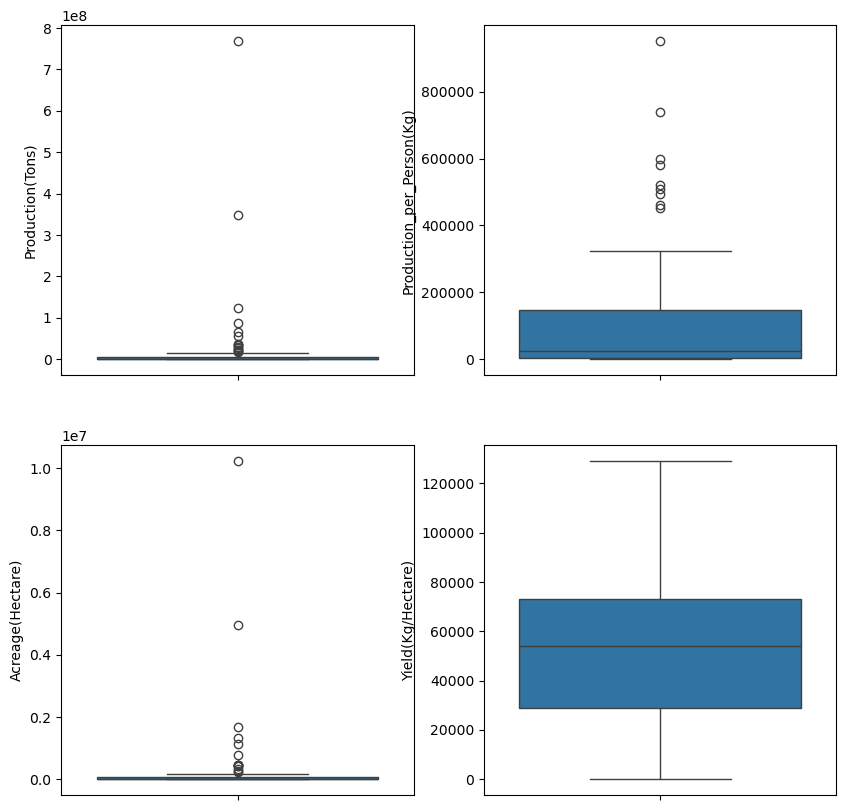

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_Person(Kg)"])
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])

In [22]:
df.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


Bivariate Analysis

In [23]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


which country produces maximum sugercane?

In [24]:
df_new = df[["Country", "Production(Tons)"]].set_index("Country")
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [25]:
df_new ["Production(Tons)_percent"]= df_new["Production(Tons)"]*100/df_new["Production(Tons)"].sum()
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

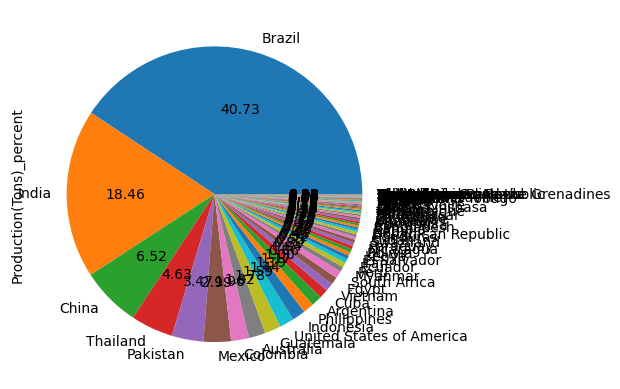

In [26]:
df_new["Production(Tons)_percent"].plot(kind="pie",autopct="%.2f")

<Axes: xlabel='Country'>

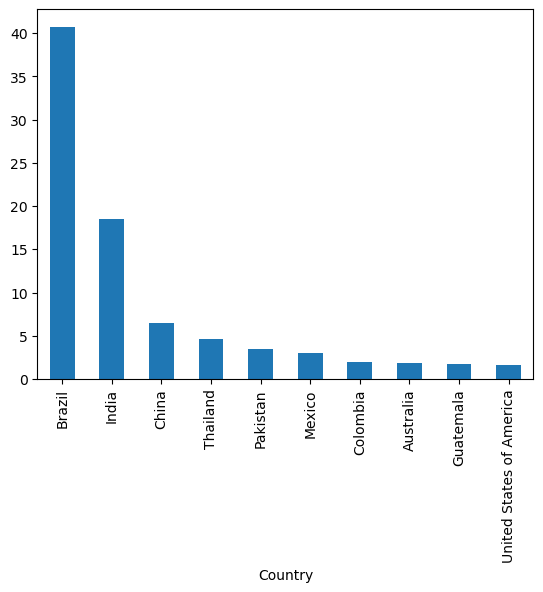

In [27]:
df_new["Production(Tons)_percent"].head(10).plot(kind="bar")

In [28]:
df.head(10)

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
5,Mexico,North America,56446821.0,452524.000,781054.0,7227.0
6,Colombia,South America,36951213.0,740075.000,416626.0,88691.5
7,Australia,Oceania,34403004.0,1373.406,447204.0,76929.1
8,Guatemala,North America,33533403.0,1938.114,25985.0,129049.3
9,United States of America,North America,29926210.0,91304.000,37053.0,80766.0


C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_4924\292955204.py:2: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  ax = sns.barplot(data=df.head(10), x="Country", y="Production(Tons)", hue= "Country" ,palette=palette)
C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_4924\292955204.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


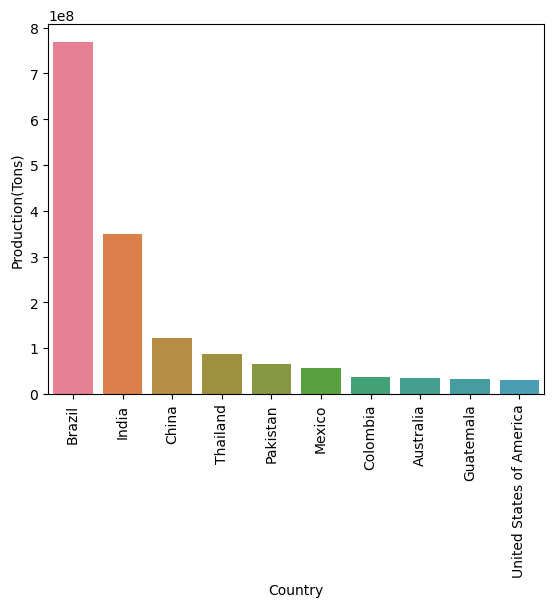

In [43]:
palette = sns.color_palette("husl", len(df.head(15)))  
ax = sns.barplot(data=df.head(10), x="Country", y="Production(Tons)", hue= "Country" ,palette=palette)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  
plt.show()

which country has highest land?

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_4924\90106108.py:2: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  ax = sns.barplot(data=df_acr.head(10), x="Country", y="Acreage(Hectare)", hue = "Country" , palette=palette)
C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_4924\90106108.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


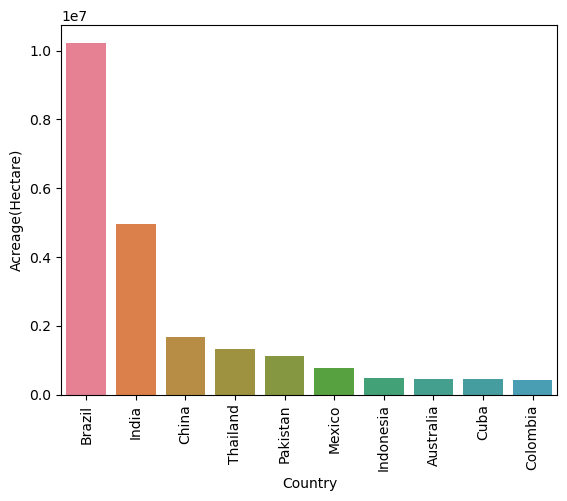

In [44]:
df_acr = df.sort_values("Acreage(Hectare)", ascending=False)
ax = sns.barplot(data=df_acr.head(10), x="Country", y="Acreage(Hectare)", hue = "Country" , palette=palette)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

which country has highest yield per hectare?


C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_4924\2610327521.py:2: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  ax = sns.barplot(data=df_yield.head(10), x="Country", y="Yield(Kg/Hectare)", hue = "Country",palette=palette)
C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_4924\2610327521.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90,)


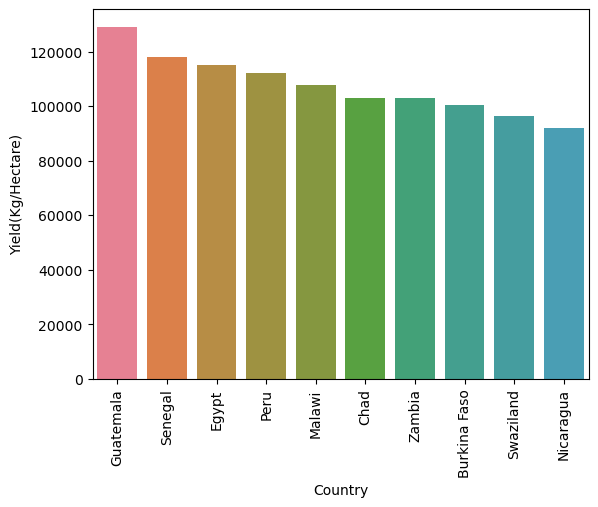

In [39]:
df_yield = df.sort_values("Yield(Kg/Hectare)", ascending=False)
ax = sns.barplot(data=df_yield.head(10), x="Country", y="Yield(Kg/Hectare)", hue = "Country",palette=palette)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,)  
plt.show()

which country highest production?

correlation

In [35]:
numeric_cols = df.select_dtypes(include=['number']).columns
numeric_df = df[numeric_cols]
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                           Production(Tons)  Production_per_Person(Kg)  \
Production(Tons)                   1.000000                   0.015000   
Production_per_Person(Kg)          0.015000                   1.000000   
Acreage(Hectare)                   0.997550                   0.012557   
Yield(Kg/Hectare)                  0.132812                   0.017999   

                           Acreage(Hectare)  Yield(Kg/Hectare)  
Production(Tons)                   0.997550           0.132812  
Production_per_Person(Kg)          0.012557           0.017999  
Acreage(Hectare)                   1.000000           0.113433  
Yield(Kg/Hectare)                  0.113433           1.000000  


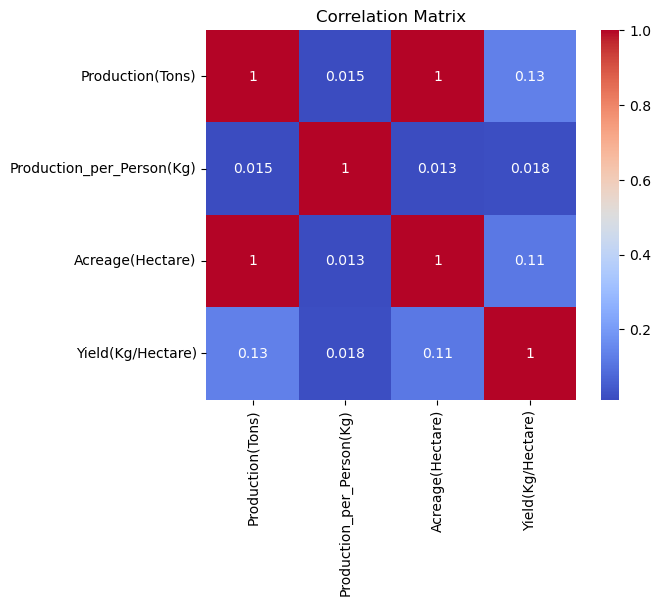

In [37]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()